In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import math

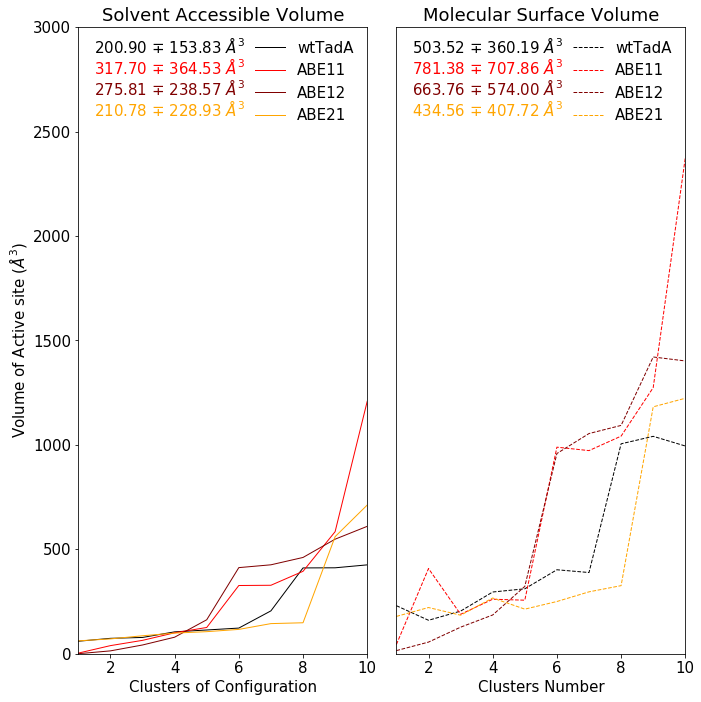

In [10]:
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(10,10))
gridspec.GridSpec(1,2)


x = np.array([1,2,3,4,5,6,7,8,9,10])

ax1=plt.subplot2grid((1,2), (0,0), colspan=1,rowspan=1)
df0 = pd.read_csv('0_vol.dat')
df0 = df0.sort_values('vol_sa')
y0_1  = df0['vol_sa']
y_0_mean = df0['vol_sa'].mean()
y_0_std = df0['vol_sa'].std()
y_0_mean_2 = df0['vol_ms'].mean()
y_0_std_2 = df0['vol_ms'].std()

plt.text(1.5,2875,r"%.2f $\mp$ %.2f $\AA^3$"%(y_0_mean,y_0_std), color='black')

y0_2  = df0['vol_ms']
x0  = x
ax1.plot(x0,y0_1,color = 'black', linestyle='-', linewidth=1,label='wtTadA')


df1 = pd.read_csv('1_vol.dat')
df1 = df1.sort_values('vol_sa')
y1_1  = df1['vol_sa']
y1_2  = df1['vol_ms']
y_1_mean = df1['vol_sa'].mean()
y_1_std = df1['vol_sa'].std()
y_1_mean_2 = df1['vol_ms'].mean()
y_1_std_2 = df1['vol_ms'].std()
plt.text(1.5,2775,r"%.2f $\mp$ %.2f $\AA^3$"%(y_1_mean,y_1_std), color='red')
x1  = x
ax1.plot(x1,y1_1,color = 'red', linestyle='-', linewidth=1,label='ABE11')

df2 = pd.read_csv('2_vol.dat')
df2 = df2.sort_values('vol_sa')
y2_1  = df2['vol_sa']
y2_2  = df2['vol_ms']
y_2_mean = df2['vol_sa'].mean()
y_2_std = df2['vol_sa'].std()
y_2_mean_2 = df2['vol_ms'].mean()
y_2_std_2 = df2['vol_ms'].std()
plt.text(1.5,2675,r"%.2f $\mp$ %.2f $\AA^3$"%(y_2_mean,y_2_std), color='maroon')
x2  = x
ax1.plot(x2,y2_1,color = 'maroon', linestyle='-', linewidth=1,label='ABE12')


df3 = pd.read_csv('3_vol.dat')
df3 = df3.sort_values('vol_sa')
y3_1  = df3['vol_sa']
y3_2  = df3['vol_ms']
y_3_mean = df3['vol_sa'].mean()
y_3_std = df3['vol_sa'].std()
y_3_mean_2 = df3['vol_ms'].mean()
y_3_std_2 = df3['vol_ms'].std()
plt.text(1.5,2575,r"%.2f $\mp$ %.2f $\AA^3$"%(y_3_mean,y_3_std), color='orange')
x3  = x
ax1.plot(x3,y3_1,color = 'orange', linestyle='-', linewidth=1,label='ABE21')
ax1.set_xlim(1,10)
ax1.set_ylim(0,3000)
plt.xlabel(r"Clusters of Configuration")
plt.ylabel(r"Volume of Active site ($\AA^3$)")
ax1.title.set_text('Solvent Accessible Volume')
plt.legend(loc='upper right',frameon=False)



ax2=plt.subplot2grid((1,2), (0,1), colspan=1,rowspan=1)
ax2.plot(x0,y0_2,color = 'black', linestyle='--', linewidth=1,label='wtTadA')
ax2.plot(x1,y1_2,color = 'red', linestyle='--', linewidth=1,label='ABE11')
ax2.plot(x2,y2_2,color = 'maroon', linestyle='--', linewidth=1,label='ABE12')
ax2.plot(x3,y3_2,color = 'orange', linestyle='--', linewidth=1,label='ABE21')
plt.text(1.5,2875,r"%.2f $\mp$ %.2f $\AA^3$"%(y_0_mean_2,y_0_std_2), color='black')
plt.text(1.5,2775,r"%.2f $\mp$ %.2f $\AA^3$"%(y_1_mean_2,y_1_std_2), color='red')
plt.text(1.5,2675,r"%.2f $\mp$ %.2f $\AA^3$"%(y_2_mean_2,y_2_std_2), color='maroon')
plt.text(1.5,2575,r"%.2f $\mp$ %.2f $\AA^3$"%(y_3_mean_2,y_3_std_2), color='orange')
ax2.set_xlim(1,10)
ax2.set_ylim(0,3000)
ax2.set_yticks([])
ax2.title.set_text('Molecular Surface Volume')
plt.xlabel(r"Clusters Number")
plt.legend(loc='upper right',frameon=False)


fig.tight_layout()
plt.show()
fig.savefig('Compare_cluster_vol.png', dpi=500)

# RMSD full Protein

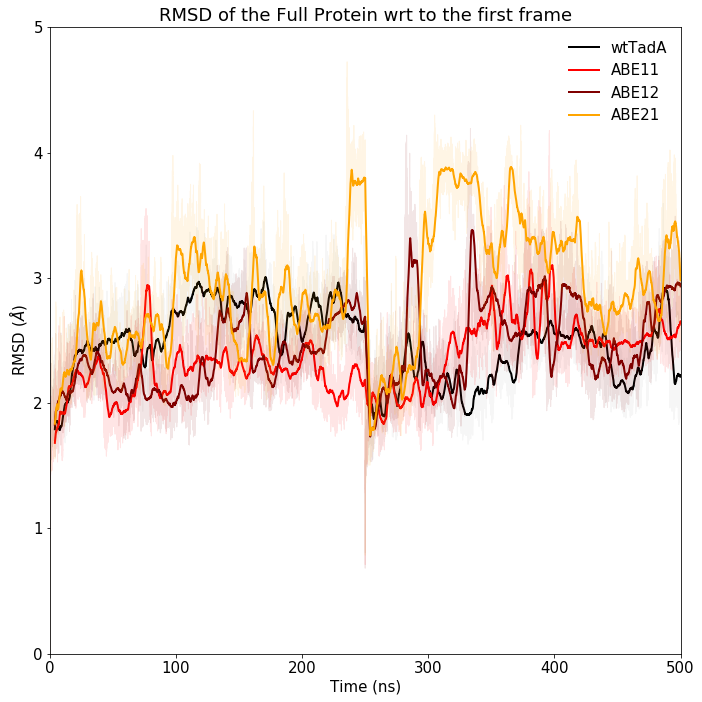

In [30]:
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(10,10))

df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/wt/traj_analysis/rmsd/rmsdallfull.dat', delim_whitespace=True)
wt_rmsd = df1['all']
wt_roll_avg = df1['all'].rolling(window=2000).mean()  #averaged over 500 frames i.e 1 ns
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe11/traj_analysis/rmsd/rmsdallfull.dat', delim_whitespace=True)
abe11_rmsd = df2['all']
abe11_roll_avg = df2['all'].rolling(window=2000).mean()
df3 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe12/traj_analysis/rmsd/rmsdallfull.dat', delim_whitespace=True)
abe12_rmsd = df3['all']
abe12_roll_avg = df3['all'].rolling(window=2000).mean()
df4 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe21/traj_analysis/rmsd/rmsdallfull.dat', delim_whitespace=True)
abe21_rmsd = df4['all']
abe21_roll_avg = df4['all'].rolling(window=2000).mean()

time = df1['#Frame']/500

ax.plot(time,wt_rmsd,color = 'darkgray', alpha=0.1, linestyle='-', linewidth=1,label='_nolegend_')
ax.plot(time,wt_roll_avg, color='black', linewidth=2,label='wtTadA')
ax.plot(time,abe11_rmsd,color = 'red', alpha=0.1, linestyle='-', linewidth=1,label='_nolegend_')
ax.plot(time,abe11_roll_avg, color='red', linewidth=2,label='ABE11')
ax.plot(time,abe12_rmsd,color = 'maroon', alpha=0.1, linestyle='-', linewidth=1,label='_nolegend_')
ax.plot(time,abe12_roll_avg, color='maroon', linewidth=2,label='ABE12')
ax.plot(time,abe21_rmsd,color = 'orange', alpha=0.1, linestyle='-', linewidth=1,label='_nolegend_')
ax.plot(time,abe21_roll_avg, color='orange', linewidth=2,label='ABE21')

ax.title.set_text('RMSD of the Full Protein wrt to the first frame')
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r"Time (ns)")
plt.ylabel(r"RMSD ($\AA$)")

ax.set_xlim(0,500)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
fig.savefig('RMSD_all.png', dpi=500)


# RMSF whole protein 

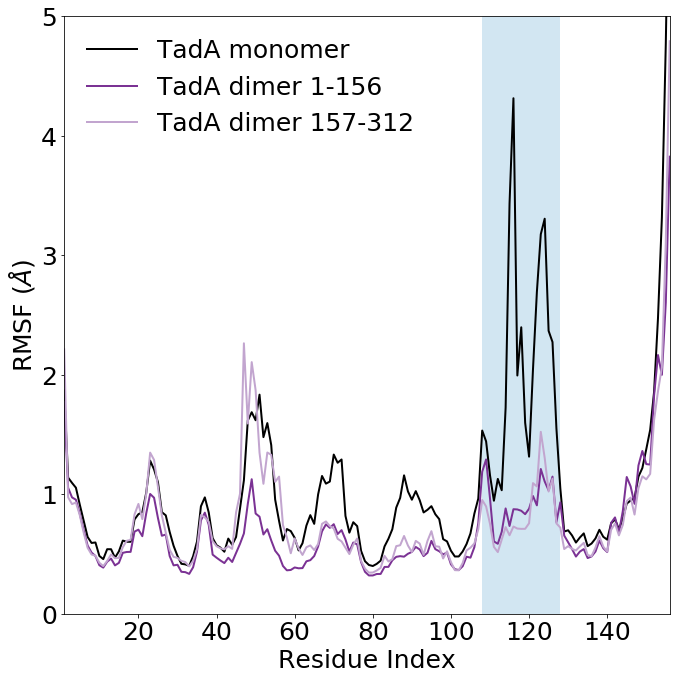

In [5]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/pochu/projects/TadA_dimer/analysis/RMSF_156.dat', delim_whitespace=True)
all_rmsf_156 = df1['AtomicFlx']
df2 = pd.read_csv('/home/pochu/projects/TadA_dimer/analysis/RMSF_312.dat', delim_whitespace=True)
all_rmsf_312 = df2['AtomicFlx']
df3 = pd.read_csv('/home/pochu/projects/TadA_dimer/analysis/RMSF_wt.dat', delim_whitespace=True)
all_rmsf_monomer = df3['AtomicFlx']



resid = df1['#Res']

ax.plot(resid,all_rmsf_monomer,color = 'black', linestyle='-', linewidth=2,label='TadA monomer')
ax.plot(resid,all_rmsf_156,color = '#7b3294', linestyle='-', linewidth=2,label='TadA dimer 1-156')
ax.plot(resid,all_rmsf_312,color = '#c2a5cf', linestyle='-', linewidth=2,label='TadA dimer 157-312')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)

#plt.axvline(x=107, linestyle='--')
#plt.axvline(x=105, linestyle='--')
#plt.axvline(x=146, linestyle='--')
#plt.axvline(x=154, linestyle='--')
#107
#plt.text(102,4.75,r"D108N", color='red', bbox=dict(facecolor='white'))
#plt.text(102,4.25,r"A106V", color='maroon', bbox=dict(facecolor='white'))
#plt.text(130,4.75,r"D147Y", color='orange', bbox=dict(facecolor='white'))
#plt.text(130,4.25,r"E155V", color='orange', bbox=dict(facecolor='white'))


rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
ax.add_patch(rect)

ax.set_xlim(1,156)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
fig.savefig('RMSF_monomer_dimer.png', dpi=300)

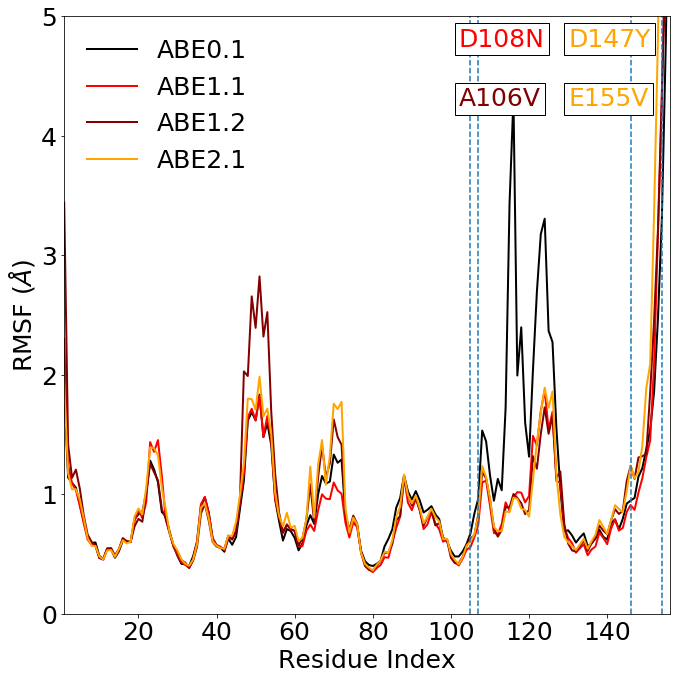

In [7]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/wt/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
wt_rmsf = df1['AtomicFlx']
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe11/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
abe11_rmsf = df2['AtomicFlx']
df3 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe12/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
abe12_rmsf = df3['AtomicFlx']
df4 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe21/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
abe21_rmsf = df4['AtomicFlx']

resid = df1['#Res']

ax.plot(resid,wt_rmsf,color = 'black', linestyle='-', linewidth=2,label='ABE0.1')
ax.plot(resid,abe11_rmsf,color = 'red', linestyle='-', linewidth=2,label='ABE1.1')
ax.plot(resid,abe12_rmsf,color = '#840000', linestyle='-', linewidth=2,label='ABE1.2')
ax.plot(resid,abe21_rmsf,color = 'orange', linestyle='-', linewidth=2,label='ABE2.1')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)

plt.axvline(x=107, linestyle='--')
plt.axvline(x=105, linestyle='--')
plt.axvline(x=146, linestyle='--')
plt.axvline(x=154, linestyle='--')
#107
plt.text(102,4.75,r"D108N", color='red', bbox=dict(facecolor='white'))
plt.text(102,4.25,r"A106V", color='maroon', bbox=dict(facecolor='white'))
plt.text(130,4.75,r"D147Y", color='orange', bbox=dict(facecolor='white'))
plt.text(130,4.25,r"E155V", color='orange', bbox=dict(facecolor='white'))


#rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
#ax.add_patch(rect)

ax.set_xlim(1,156)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
fig.savefig('RMSF_wtabe11abe12abe21.png', dpi=1000)

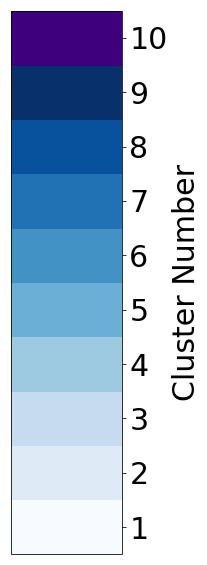

In [57]:
from matplotlib import colors
import matplotlib as mpl


plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 30})
fig,ax = plt.subplots(figsize=(2,10))

bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cmap = colors.ListedColormap(['#f7fbff','#deebf7', '#c6dbef' ,'#9ecae1','#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b', '#3f007d' ])
norm = colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Cluster Number')

#cbar = fig.colorbar(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#cbar.ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # vertically oriented colorbar


ticks_locs = [(x + 0.5) for x in bounds]
cb1.set_ticks(ticks_locs)

cb1.ax.set_yticklabels(bounds)  # vertically oriented colorbar

plt.show()
fig.tight_layout()
fig.savefig('cbar.png', dpi=1000)


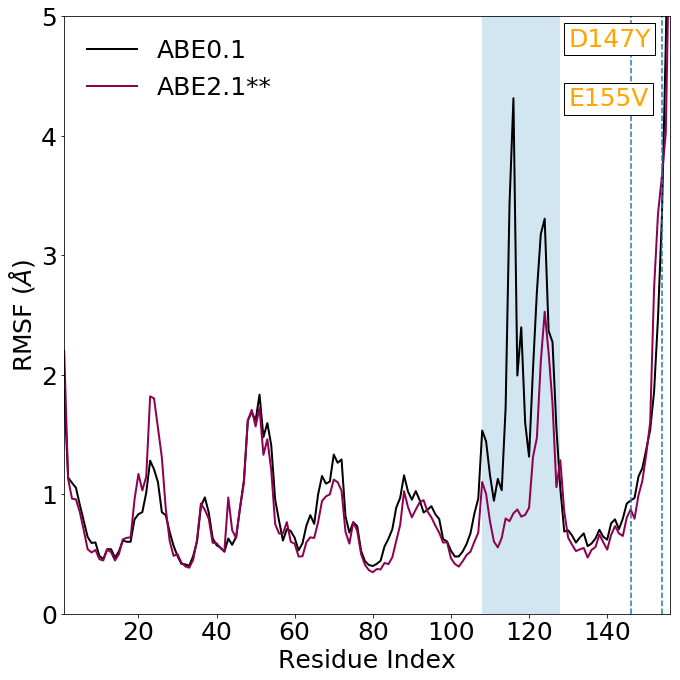

In [9]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/wt/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
wt_rmsf = df1['AtomicFlx']
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/Mod_mono/rmsf/mod_abe12/analysis/RMSF.dat', delim_whitespace=True)
mod_abe12_rmsf = df2['AtomicFlx']
df3 = pd.read_csv('/home/krallapa/projects/CRISPR/Mod_mono/rmsf/mod_abe21/analysis/RMSF.dat', delim_whitespace=True)
mod_abe21_rmsf = df3['AtomicFlx']
df4 = pd.read_csv('/home/krallapa/projects/CRISPR/Mod_mono/rmsf/double_mod_abe21/analysis/RMSF.dat', delim_whitespace=True)
mod2_abe21_rmsf = df4['AtomicFlx']
#/home/krallapa/projects/CRISPR/Mod_mono/rmsf/double_mod_abe21/analysis
resid = df1['#Res']

ax.plot(resid,wt_rmsf,color = 'black', linestyle='-', linewidth=2,label='ABE0.1')
#ax.plot(resid,mod_abe12_rmsf,color = '#5cac2d', linestyle='-', linewidth=2,label='ABE1.1*')
#ax.plot(resid,mod_abe21_rmsf,color = '#41b6c4', linestyle='-', linewidth=2,label='ABE2.1*')
ax.plot(resid,mod2_abe21_rmsf,color = '#8e0152', linestyle='-', linewidth=2,label='ABE2.1**')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)

#plt.axvline(x=107, linestyle='--')
#plt.axvline(x=105, linestyle='--')
plt.axvline(x=146, linestyle='--')
plt.axvline(x=154, linestyle='--')
#107
#plt.text(102,4.75,r"D108N", color='red', bbox=dict(facecolor='white'))
#plt.text(102,4.25,r"A106V", color='maroon', bbox=dict(facecolor='white'))
plt.text(130,4.75,r"D147Y", color='orange', bbox=dict(facecolor='white'))
plt.text(130,4.25,r"E155V", color='orange', bbox=dict(facecolor='white'))


rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
ax.add_patch(rect)

ax.set_xlim(1,156)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
fig.savefig('RMSF_wtmod_abe21_mod2.png', dpi=1000)

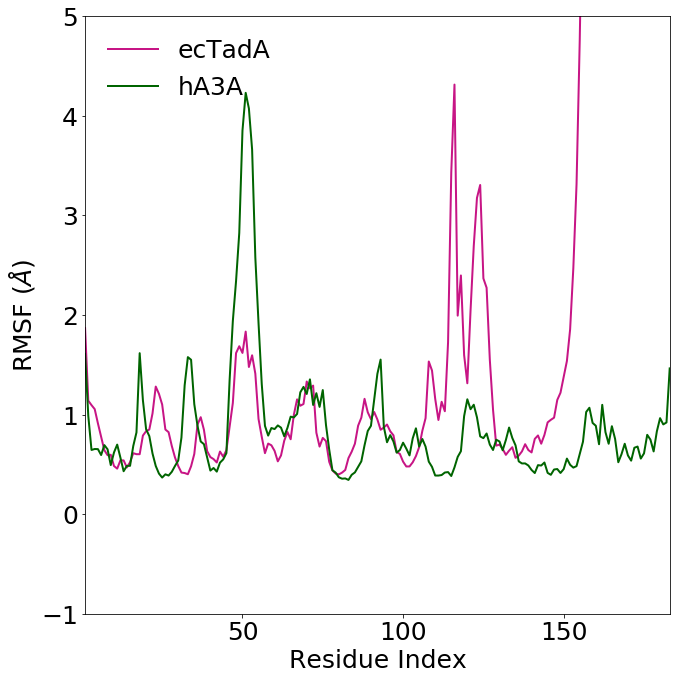

In [21]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/wt/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
wt_rmsf = df1['AtomicFlx']
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/CBE/RMSF/wt/analysis/RMSF.dat', delim_whitespace=True)
cbe_rmsf = df2['AtomicFlx']


resid_1 = df1['#Res']
resid_2 = df2['#Res']
ax.plot(resid_1,wt_rmsf,color = 'mediumvioletred', linestyle='-', linewidth=2,label='ecTadA')
ax.plot(resid_2, cbe_rmsf,color = 'darkgreen', linestyle='-', linewidth=2,label='hA3A')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)




rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
#ax.add_patch(rect)

ax.set_xlim(1,183)
ax.set_ylim(-1,5)
fig.tight_layout()
plt.show()
fig.savefig('RMSF_TadA_A3A.png', dpi=1000)

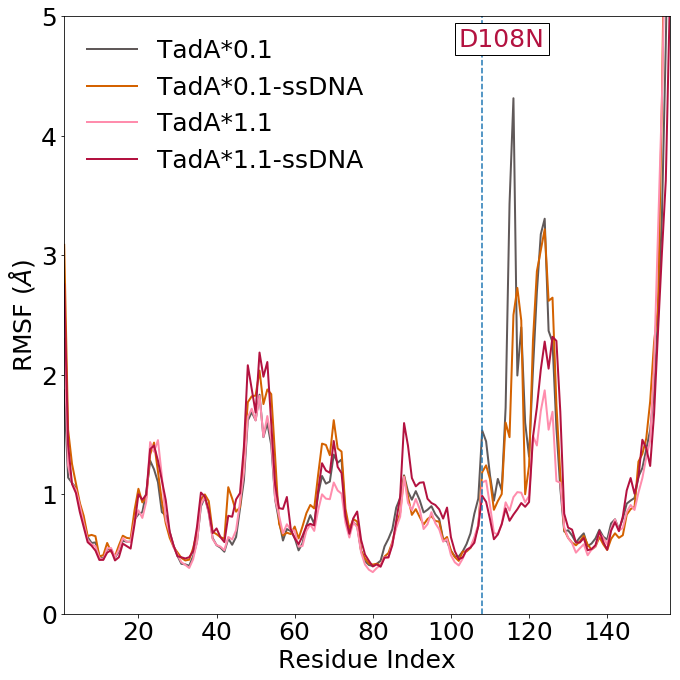

In [ ]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/wt/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
wt_rmsf = df1['AtomicFlx']
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/wt_DNA/better_looking_DNA/prods/RMSF.dat', delim_whitespace=True)
wt_DNA_rmsf = df2['AtomicFlx']
df3 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe11/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
abe11_rmsf = df3['AtomicFlx']
df4 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/ABE11/prods/RMSF.dat', delim_whitespace=True)
abe11_DNA_rmsf = df4['AtomicFlx']


resid = df1['#Res']

ax.plot(resid,wt_rmsf,color = '#605959', linestyle='-', linewidth=2,label='TadA*0.1')
ax.plot(resid,wt_DNA_rmsf,color = '#d46200', linestyle='-', linewidth=2,label='TadA*0.1-ssDNA')
ax.plot(resid,abe11_rmsf,color = '#ff8dad', linestyle='-', linewidth=2,label='TadA*1.1')
ax.plot(resid,abe11_DNA_rmsf,color = '#b31240', linestyle='-', linewidth=2,label='TadA*1.1-ssDNA')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)

plt.axvline(x=108, linestyle='--')
#plt.axvline(x=105, linestyle='--')
#plt.axvline(x=146, linestyle='--')
#plt.axvline(x=154, linestyle='--')
#107
plt.text(102,4.75,r"D108N", color='#b31240', bbox=dict(facecolor='white'))
#plt.text(102,4.25,r"A106V", color='maroon', bbox=dict(facecolor='white'))
#lt.text(130,4.75,r"D147Y", color='orange', bbox=dict(facecolor='white'))
#lt.text(130,4.25,r"E155V", color='orange', bbox=dict(facecolor='white'))


#rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
#ax.add_patch(rect)

ax.set_xlim(1,156)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
fig.savefig('MIRA_RMSF.png', dpi=300)

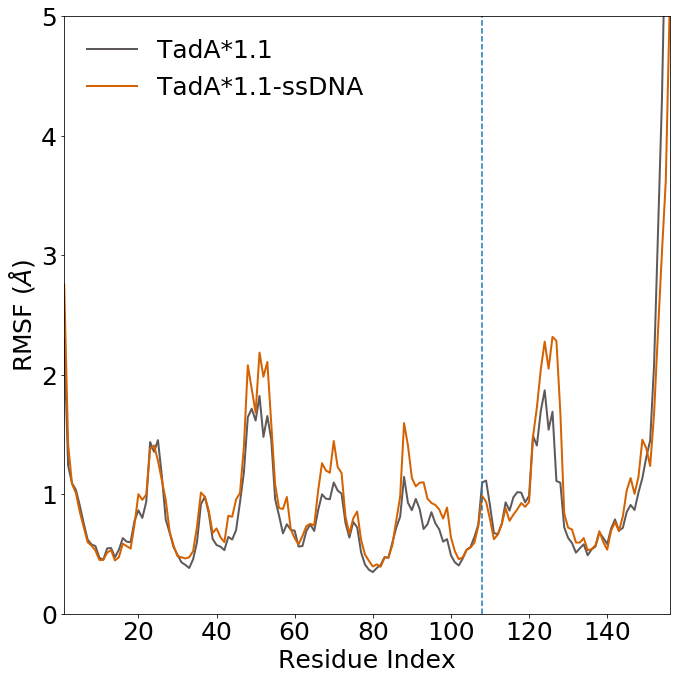

In [5]:
import matplotlib.patches as patches

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(10,10))


df1 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/Pocket_sims/abe11/traj_analysis/rmsf/RMSF.dat', delim_whitespace=True)
wt_rmsf = df1['AtomicFlx']
df2 = pd.read_csv('/home/krallapa/projects/CRISPR/monos/ABE11/prods/RMSF.dat', delim_whitespace=True)
wt_DNA_rmsf = df2['AtomicFlx']

resid = df1['#Res']

ax.plot(resid,wt_rmsf,color = '#605959', linestyle='-', linewidth=2,label='TadA*1.1')
ax.plot(resid,wt_DNA_rmsf,color = '#d46200', linestyle='-', linewidth=2,label='TadA*1.1-ssDNA')

#ax.title.set_text("RMSF of the Protein wrt it's Average Structure")
plt.legend(loc='upper left',frameon=False)
plt.xlabel(r"Residue Index", fontsize = 25)
plt.ylabel(r"RMSF ($\AA$)", fontsize = 25)

plt.axvline(x=108, linestyle='--')
#plt.axvline(x=105, linestyle='--')
#plt.axvline(x=146, linestyle='--')
#plt.axvline(x=154, linestyle='--')
#107
#plt.text(102,4.75,r"D108N", color='red', bbox=dict(facecolor='white'))
#plt.text(102,4.25,r"A106V", color='maroon', bbox=dict(facecolor='white'))
#lt.text(130,4.75,r"D147Y", color='orange', bbox=dict(facecolor='white'))
#lt.text(130,4.25,r"E155V", color='orange', bbox=dict(facecolor='white'))


#rect = patches.Rectangle((108,0),20,5,linewidth= 2, edgecolor='none', facecolor='#6baed6', alpha=0.3)
#ax.add_patch(rect)

ax.set_xlim(1,156)
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()
#fig.savefig('MIRA_RMSF.png', dpi=300)